In [254]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Dataset

In [255]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(m, 1)

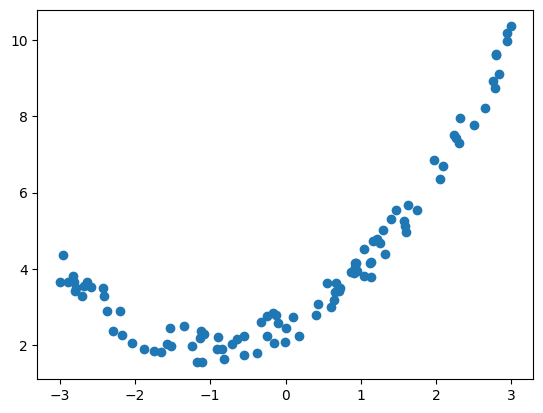

In [256]:
plt.scatter(x, y)
plt.show()

# kernel trick

In [257]:
norm = StandardScaler()
x = norm.fit_transform(x)

In [258]:
landmarks = x

In [259]:
def kernel_trick(x_, landmarks_):
    X_ = np.zeros((x_.shape[0], landmarks_.shape[0]))
    n_column = 0
    for l_ in landmarks_:
        new_x_ = kernel_function(x_, l_)
        X_[:, n_column] = new_x_
        n_column +=1
    return X_

## Noyau gaussien

In [260]:
def kernel_function(x_, l_, sigma_=1):
    return np.exp( -(np.linalg.norm(x_ - l_, axis=1))**2 / (2 * sigma_**2) )

In [261]:
X = kernel_trick(x, landmarks)

In [262]:
linear_reg = LinearRegression()
linear_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


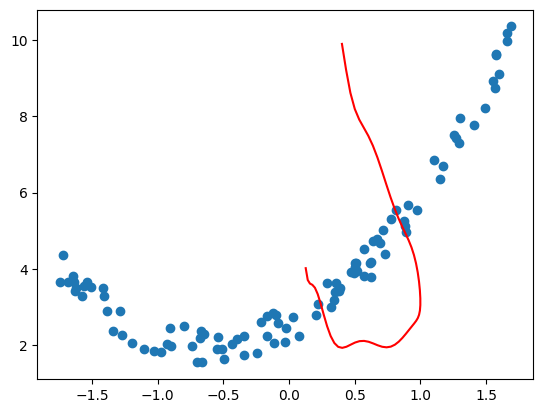

In [263]:
new_x = np.array(np.arange(-3, 3, 0.1)).reshape(-1, 1)
new_x = norm.transform(new_x)
x_line = kernel_trick(new_x, landmarks)

y_line = linear_reg.predict(x_line)
plt.plot(x_line[:, 0], y_line[:, 0], color="red")
plt.scatter(x, y)
plt.show()